In [4]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools
%matplotlib inline

In [5]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from sklearn.metrics import mean_squared_error as mse

In [6]:
def model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)

    x = BatchNormalization()(input_img)

    x = Conv2D(filters = 16, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = Conv2D(filters = 16, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(filters = 32, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = Conv2D(filters = 32, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(filters = 64, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = Conv2D(filters = 64, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(filters = 128, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = Conv2D(filters = 128, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(filters = 256, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = Conv2D(filters = 256, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = Flatten()(x)

    branch_1 = Dense(120, kernel_initializer = glorot_uniform(seed=0), activation = 'relu')(x)
    branch_2 = Dense(120, kernel_initializer = glorot_uniform(seed=0), activation = 'relu')(x)
    branch_3 = Dense(120, kernel_initializer = glorot_uniform(seed=0), activation = 'relu')(x)
    branch_4 = Dense(120, kernel_initializer = glorot_uniform(seed=0), activation = 'relu')(x)

    branch_1 = Dense(96, activation = 'linear')(branch_1)
    branch_2 = Dense(96, activation = 'linear')(branch_2)
    branch_3 = Dense(96, activation = 'linear')(branch_3)
    branch_4 = Dense(96, activation = 'linear')(branch_4)
    
    model = Model(inputs=input_img, outputs=[branch_1, branch_2, branch_3, branch_4])
    
    return model

In [34]:
def pretrained_model1(input_shape):
    
    input_img = tf.keras.Input(shape=input_shape)
    
    x = tf.keras.applications.resnet_v2.preprocess_input(input_img)
    
    core = tf.keras.applications.ResNet50V2(
            include_top=False,
            weights="imagenet", 
            input_tensor=None,
            input_shape=input_shape, 
            pooling="max",
            )
    
    core.trainable = False
    
    x = core(x, training = False)
    
    branch_1 = Dense(120, kernel_initializer = glorot_uniform(seed=0), activation = 'relu')(x)
    branch_2 = Dense(120, kernel_initializer = glorot_uniform(seed=0), activation = 'relu')(x)
    branch_3 = Dense(120, kernel_initializer = glorot_uniform(seed=0), activation = 'relu')(x)
    branch_4 = Dense(120, kernel_initializer = glorot_uniform(seed=0), activation = 'relu')(x)

    branch_1 = Dense(96, activation = 'linear')(branch_1)
    branch_2 = Dense(96, activation = 'linear')(branch_2)
    branch_3 = Dense(96, activation = 'linear')(branch_3)
    branch_4 = Dense(96, activation = 'linear')(branch_4)
    
    model = Model(inputs=input_img, outputs=[branch_1, branch_2, branch_3, branch_4])
    
    return model

In [23]:
input_shape = (256, 480, 3)

In [25]:
model_aug_60 = model(input_shape)

In [26]:
model_aug_60.load_weights("my_model60_aug_ckpt")

In [27]:
model_aug_60_predictions = model_aug_60.predict(test_dataset)

15/15 [==============================] - 9s 591ms/step


In [28]:
model_noaug_170 = load_model("my_model170v1.h5", compile = False)

In [29]:
model_noaug_170_predictions = model_noaug_170.predict(test_dataset)

15/15 [==============================] - 9s 564ms/step


In [30]:
pretrained_model = pretrained_model(input_shape)

In [31]:
pretrained_model.load_weights("pretrained_ckpt")

In [32]:
model_pretrained_predictions = pretrained_model.predict(test_dataset)

15/15 [==============================] - 31s 2s/step


In [35]:
pretrained_model_130 = pretrained_model1(input_shape)

In [36]:
pretrained_model_130.load_weights("pre_model170_aug_ckpt")

In [37]:
model_pre130_predictions = pretrained_model_130.predict(test_dataset)

15/15 [==============================] - 29s 2s/step


In [80]:
mse_model1 = []
for i in range(4):
    mse_model1.append(mse(output_tests[i], model_noaug_170_predictions[i], squared = False))
    print("MSE for model1_noaug for lane " + str(i) + " is: " + str(mse_model1[i]))

MSE for model1_noaug for lane 0 is: 49.73933703150245
MSE for model1_noaug for lane 1 is: 93.64678968281576
MSE for model1_noaug for lane 2 is: 132.51594504677146
MSE for model1_noaug for lane 3 is: 58.863480268886384


In [82]:
mse_model2 = []
for i in range(4):
    mse_model2.append(mse(output_tests[i], model_aug_60_predictions[i], squared = False)) 
    print("MSE for model2_aug for lane " + str(i) + " is: " + str(mse_model2[i]))

MSE for model2_aug for lane 0 is: 28.314292280452303
MSE for model2_aug for lane 1 is: 55.15307177409437
MSE for model2_aug for lane 2 is: 74.75060483380314
MSE for model2_aug for lane 3 is: 54.16922603744624


In [101]:
mse_model3 = []
for i in range(4):
    mse_model3.append(mse(output_tests[i], model_pretrained_predictions[i], squared = False)) 
    print("MSE for model3_pretrained for lane " + str(i) + " is: " + str(mse_model3[i]))

MSE for model3_pretrained for lane 0 is: 44.36318703568886
MSE for model3_pretrained for lane 1 is: 81.68481659995535
MSE for model3_pretrained for lane 2 is: 129.89980771020134
MSE for model3_pretrained for lane 3 is: 60.27411170873804


In [103]:
mse_model4 = []
for i in range(4):
    mse_model4.append(mse(output_tests[i], model_pre130_predictions[i], squared = False))
    print("MSE for model4_pretrained130 for lane " + str(i) + " is: " + str(mse_model4[i]))

MSE for model4_pretrained130 for lane 0 is: 45.01966758221406
MSE for model4_pretrained130 for lane 1 is: 78.6781484930063
MSE for model4_pretrained130 for lane 2 is: 116.17733386847375
MSE for model4_pretrained130 for lane 3 is: 60.64790622250786


In [110]:
for i in range(4):
    prosjek = (mse_model1[i] + mse_model2[i] + mse_model3[i] + mse_model4[i]) / 4
    print("Prosjek pogreške za traku " + str(i) + " je: " + str(prosjek))

Prosjek pogreške za traku 0 je: 41.85912098246442
Prosjek pogreške za traku 1 je: 77.29070663746795
Prosjek pogreške za traku 2 je: 113.33592286481242
Prosjek pogreške za traku 3 je: 58.48868105939463


In [43]:
images_model_noaug_170 = prediction_images(model_noaug_170_predictions, test_dataset)
images_model_aug_60 = prediction_images(model_aug_60_predictions, test_dataset)
images_model_pre_60 = prediction_images(model_pretrained_predictions, test_dataset)
images_model_pre_130 = prediction_images(model_noaug_170_predictions, test_dataset)

<h2> SLIKE MODELA 1 (170 epoha, bez augmentacije) </h2>

<h3> LOSS MODELA 1 : 4904 </h3>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


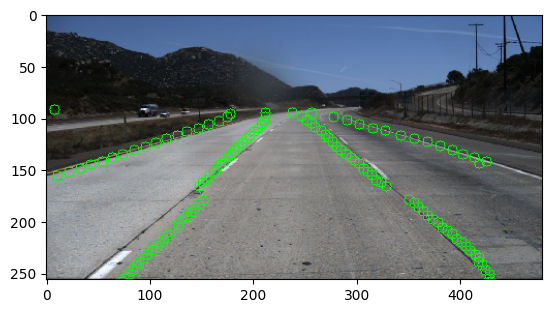

In [152]:
plt.imshow(images_model_noaug_170[examples[0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


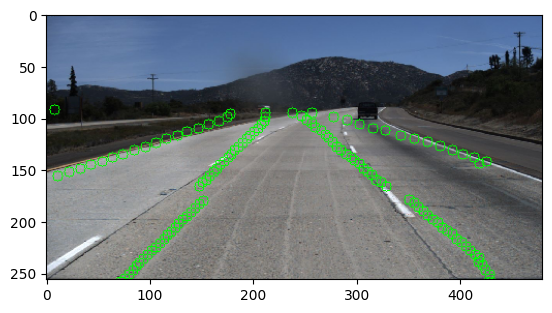

In [153]:
plt.imshow(images_model_noaug_170[examples[1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


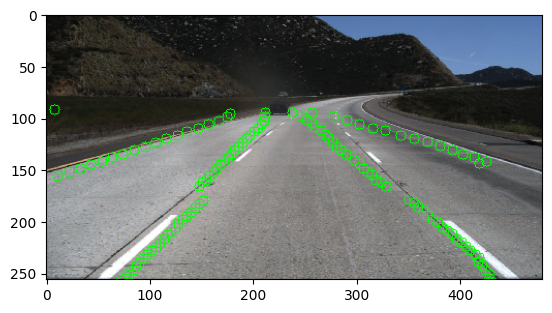

In [154]:
plt.imshow(images_model_noaug_170[examples[2]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


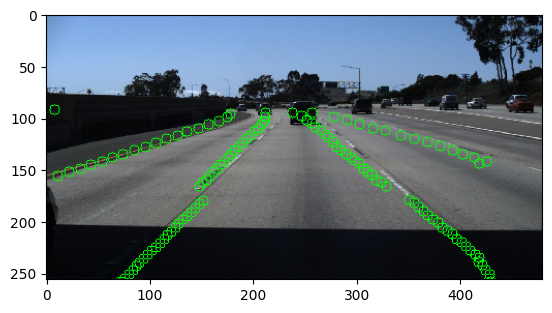

In [155]:
plt.imshow(images_model_noaug_170[examples[3]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


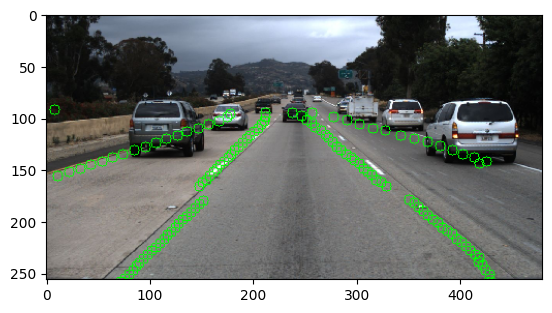

In [156]:
plt.imshow(images_model_noaug_170[examples[4]])

<h2> SLIKE MODELA 2 (70 epoha, s augmentacijom) </h2>

<h3> LOSS MODELA 2 : 1933 </h3>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


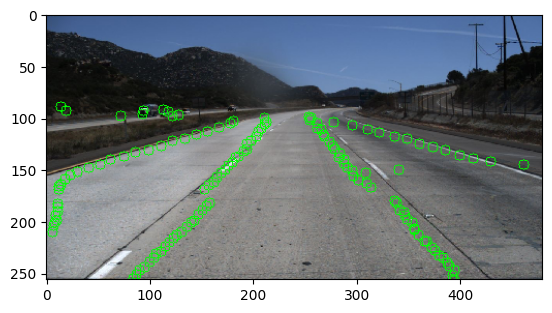

In [157]:
plt.imshow(images_model_aug_60[examples[0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


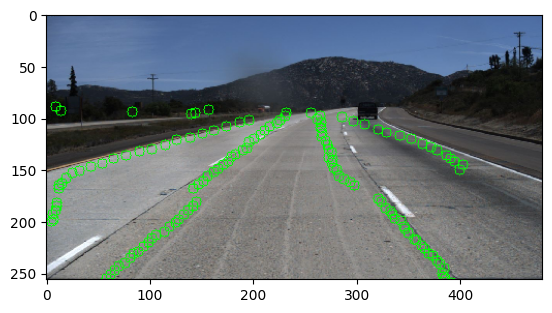

In [158]:
plt.imshow(images_model_aug_60[examples[1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


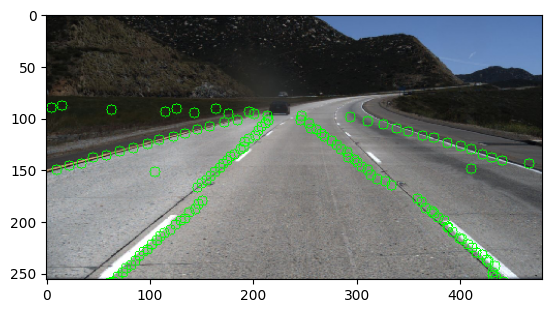

In [159]:
plt.imshow(images_model_aug_60[examples[2]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


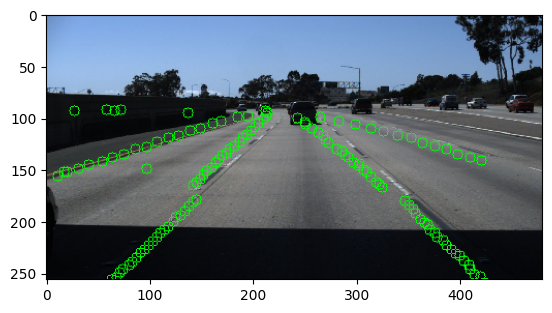

In [160]:
plt.imshow(images_model_aug_60[examples[3]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


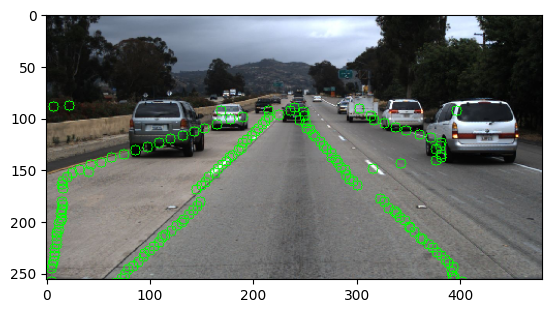

In [161]:
plt.imshow(images_model_aug_60[examples[4]])

<h2> SLIKE MODELA 3 (predtrenirani model, 70 epoha, s augmentacijom) </h2>

<h3> LOSS MODELA 3 : 3783 </h3>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


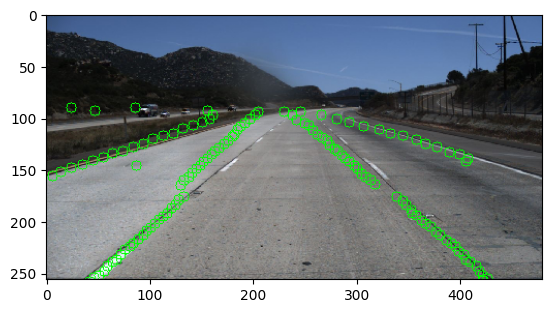

In [162]:
plt.imshow(images_model_pre_60[examples[0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


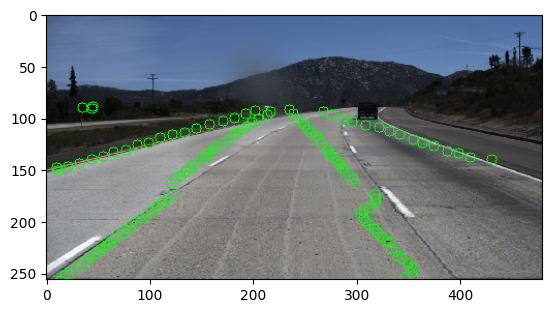

In [163]:
plt.imshow(images_model_pre_60[examples[1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


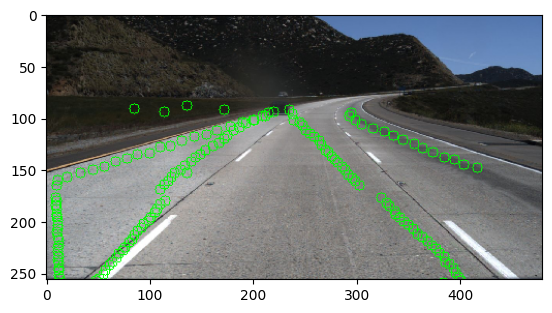

In [164]:
plt.imshow(images_model_pre_60[examples[2]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


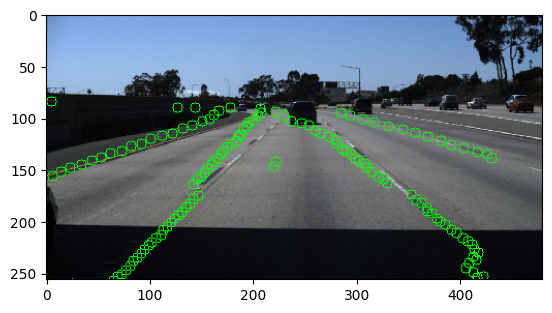

In [165]:
plt.imshow(images_model_pre_60[examples[3]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


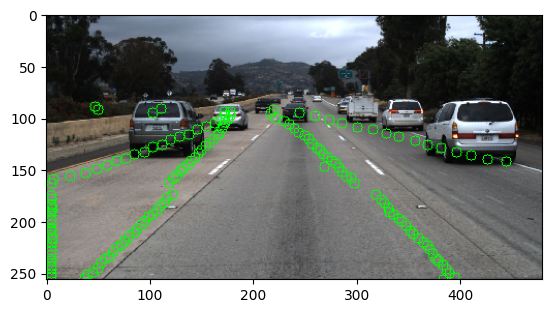

In [166]:
plt.imshow(images_model_pre_60[examples[4]])

<h2> SLKE MODELA 4 (predtrenirani model, 130 epoha, s augmentacijom) </h2>

<h3> LOSS MODELA 4 : 3058 </h3>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


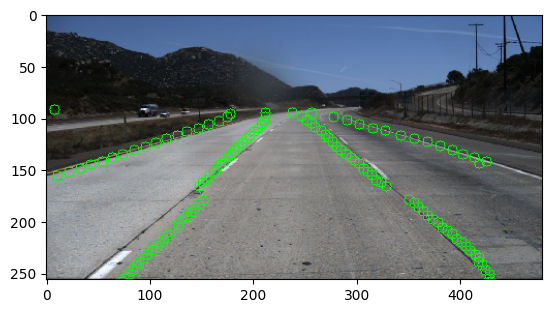

In [53]:
plt.imshow(images_model_pre_130[examples[0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


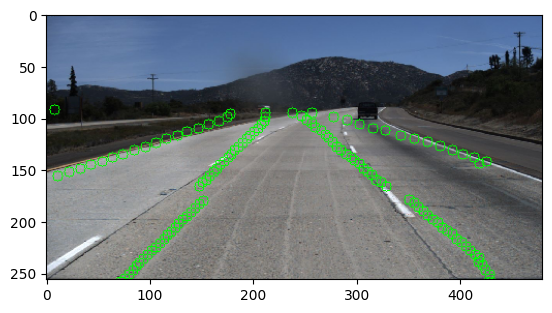

In [54]:
plt.imshow(images_model_pre_130[examples[1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


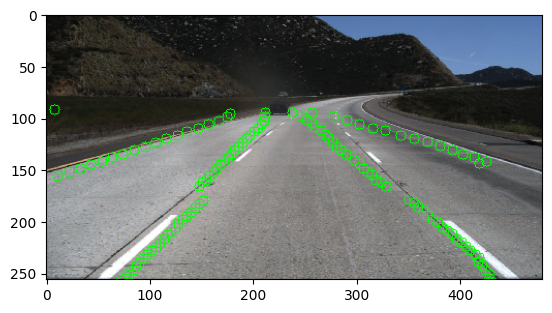

In [55]:
plt.imshow(images_model_pre_130[examples[2]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


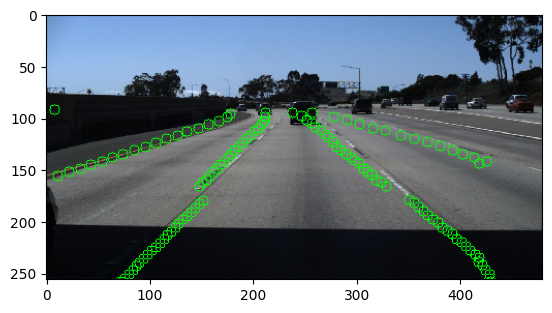

In [56]:
plt.imshow(images_model_pre_130[examples[3]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


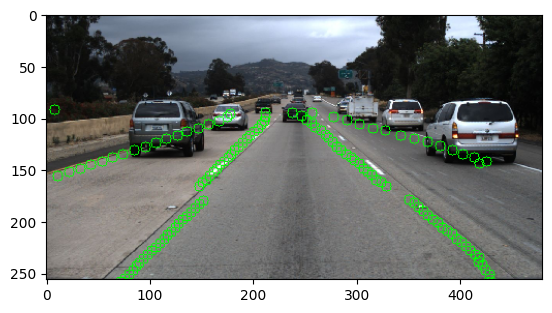

In [57]:
plt.imshow(images_model_pre_130[examples[4]])